# mfcc tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'onset-benchmark'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/onset-benchmark.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

In [3]:
import test_signals

tests = {}

for name, obj in vars(test_signals).items():
    if callable(obj):
        tests[name] = obj

print("Available tests:")
for i, name in enumerate(tests.keys()):
    print(f"{i}: {name}")



Available tests:
0: random_sines
1: saw_noise
2: sines_noise


In [4]:
SAMPLE_RATE = 44100
CURRENT_TEST = 2

Running test: sines_noise


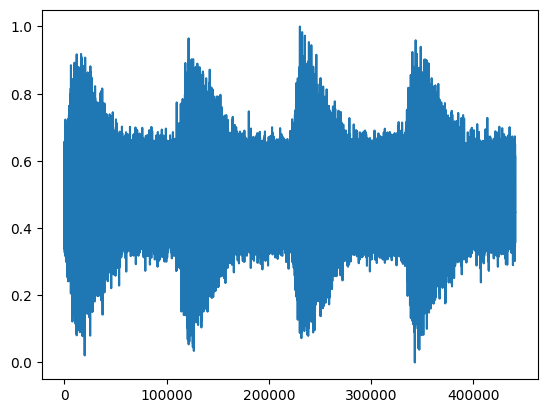

In [9]:
test = tests[list(tests.keys())[CURRENT_TEST]]
print(f"Running test: {test.__name__}")
audio = test(1)

plt.plot(audio)
plt.show()

display(Audio(audio, rate=SAMPLE_RATE))

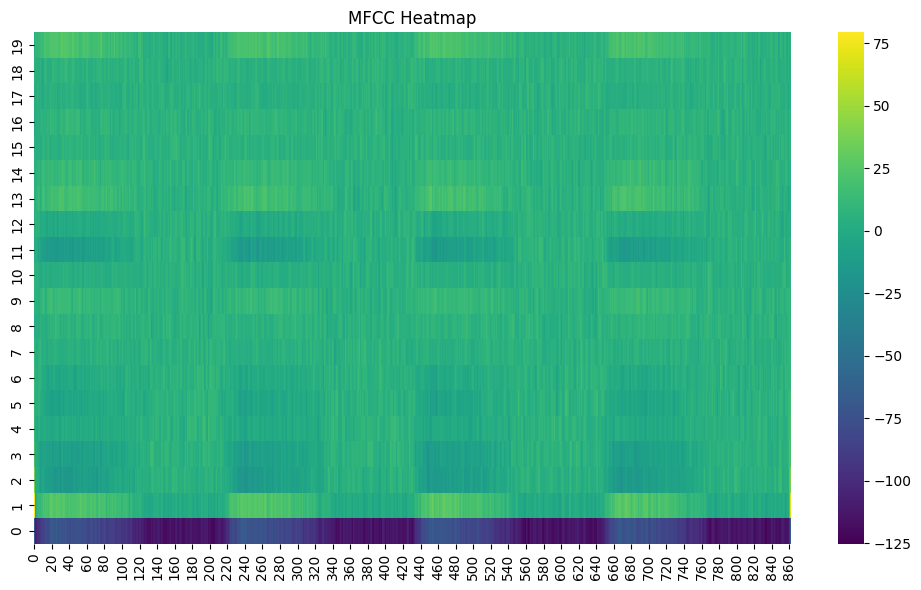

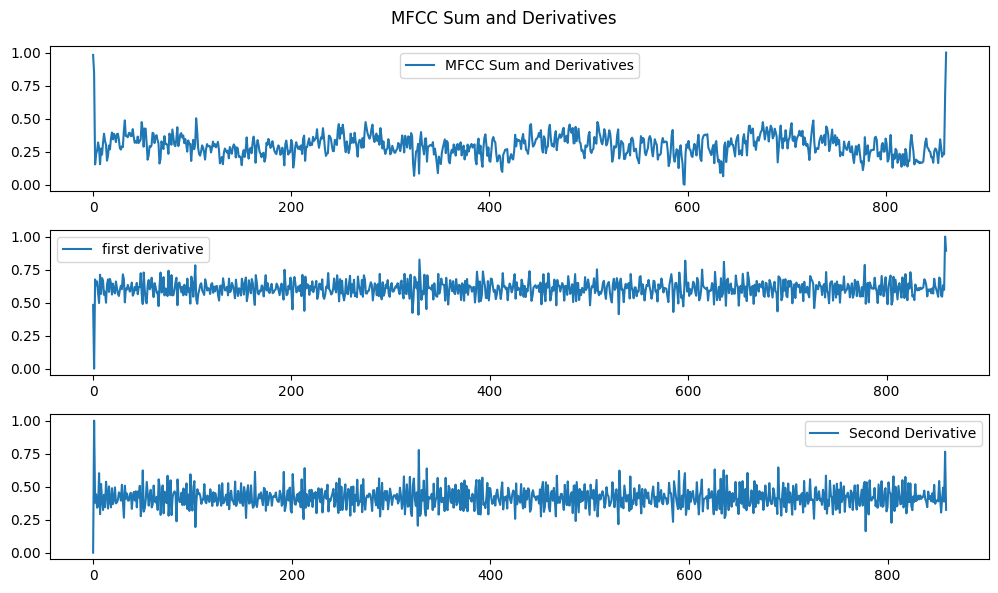

In [10]:
mfcc = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE)

utils.plot_heatmap(mfcc, title="MFCC Heatmap")

mfcc_sum = np.sum(mfcc, axis=0)
d_mfcc_sum = np.diff(mfcc_sum)
dd_mfcc_sum = np.diff(d_mfcc_sum)

utils.plot_with_derivatives(
    mfcc_sum,
    d_mfcc_sum,
    dd_mfcc_sum,
    title="MFCC Sum and Derivatives"
)



distances shape: (20, 861)


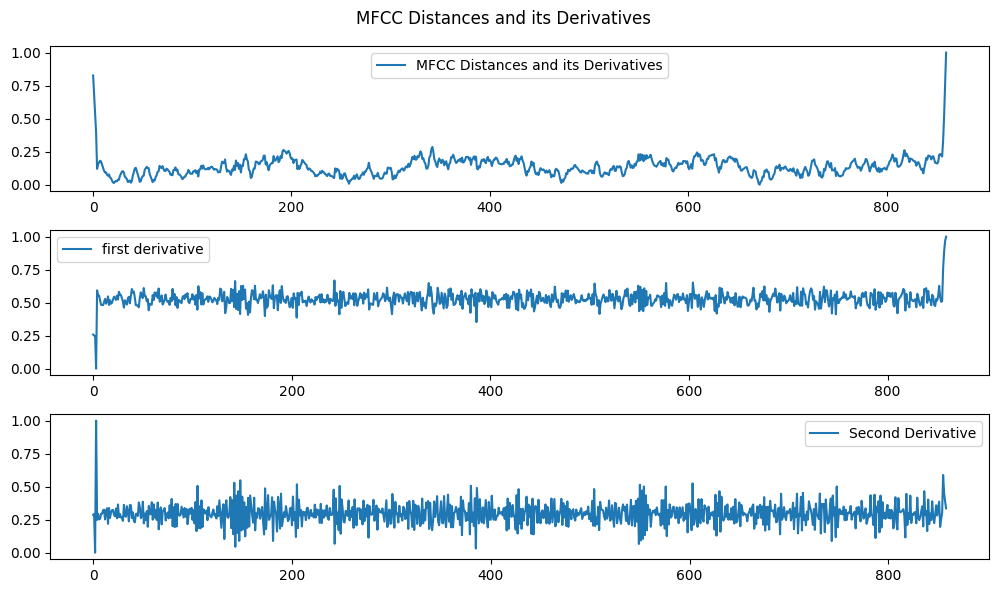

In [11]:
mfcc_distances = utils.smoothing(utils.distances(mfcc))
d_mfcc_distances = np.diff(mfcc_distances)
dd_mfcc_distances = np.diff(d_mfcc_distances)

utils.plot_with_derivatives(
    mfcc_distances,
    d_mfcc_distances,
    dd_mfcc_distances,
    title="MFCC Distances and its Derivatives"
)

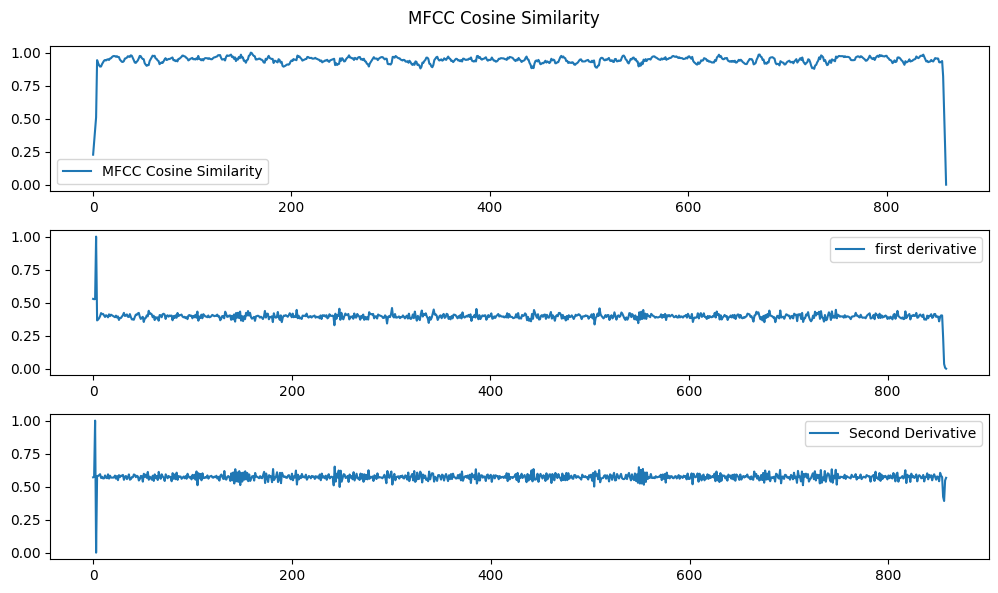

In [12]:
mfcc_cosine_similarity = utils.smoothing(utils.cosine_similarity(mfcc))
d_mfcc_cosine_similarity = np.diff(mfcc_cosine_similarity)
dd_mfcc_cosine_similarity = np.diff(d_mfcc_cosine_similarity)

utils.plot_with_derivatives(
    mfcc_cosine_similarity, 
    d_mfcc_cosine_similarity, 
    dd_mfcc_cosine_similarity, 
    title="MFCC Cosine Similarity"
)